<h1> <center> Chem Classifier </center></h1>
<h3> Model Building </h3>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Reading the data
df = pd.read_csv("data (1)",compression="gzip",index_col="Unnamed: 0")

<h3> EDA </h3>

In [ ]:
df.head()

,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_65016,px_65017,px_65018,px_65019,px_65020,px_65021,px_65022,px_65023,px_65024,label
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
df.shape

(422, 65026)

In [ ]:
df["label"].value_counts()

2    152
1    140
0    130
Name: label, dtype: int64

In [ ]:
df = df.sample(frac=1)

<b> Inference: </b>
  1. The Dataset has 422 rows and 65,026 Columns
  2. Label 0->Alkanes->130 records
  3. Label 1->Alkenes->140 records
  4. Label 2->Alkyne->152 records


<h3> Visualization </h3>

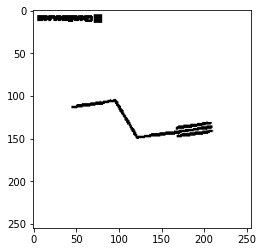

In [ ]:
plt.imshow(np.array(df.iloc[5,:255*255]).reshape(255,255),cmap='gray')

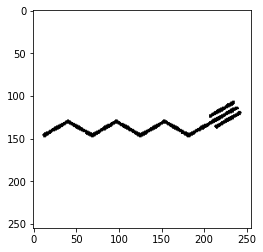

In [ ]:
plt.imshow(np.array(df.iloc[123,:255*255]).reshape(255,255),cmap='gray')

### Model Selection: Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["label"])
y = df["label"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

<h3> Model Building </h3>

1. The Model has 3 Layers 

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(2000, input_shape=(255*255,), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1000, input_shape=(2000,), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(3, input_shape=(1000,), activation='sigmoid')
])
callbk = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10,callbacks=[callbk])

Epoch 1/10
10/10 [==============================] - 26s 2s/step - loss: 1.6174 - accuracy: 0.4019
Epoch 2/10
10/10 [==============================] - 25s 3s/step - loss: 1.0358 - accuracy: 0.5633
Epoch 3/10
10/10 [==============================] - 24s 2s/step - loss: 1.0214 - accuracy: 0.6234
Epoch 4/10
10/10 [==============================] - 23s 2s/step - loss: 0.6153 - accuracy: 0.7658
Epoch 5/10
10/10 [==============================] - 23s 2s/step - loss: 0.7228 - accuracy: 0.7152
Epoch 6/10
10/10 [==============================] - 23s 2s/step - loss: 0.7107 - accuracy: 0.7373
Epoch 7/10
10/10 [==============================] - 23s 2s/step - loss: 0.5386 - accuracy: 0.8006
Epoch 8/10
10/10 [==============================] - 22s 2s/step - loss: 0.4776 - accuracy: 0.8576
Epoch 9/10
10/10 [==============================] - 23s 2s/step - loss: 0.4335 - accuracy: 0.8418
Epoch 10/10
10/10 [==============================] - 27s 3s/step - loss: 0.3942 - accuracy: 0.8956


<h3> Model Prediction </h3>

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 205ms/step - loss: 1.8818 - accuracy: 0.4057


[1.8818308115005493, 0.40566039085388184]

In [ ]:
Ylabel = ["Alkane","Alkene","Alkyne"]

<h3> Testing a random test point  </h3>

In [ ]:
Ylabel[model.predict(X_test.iloc[4,:].values.reshape(1,-1)).argmax()]

1/1 [==============================] - 0s 92ms/step


'Alkene'

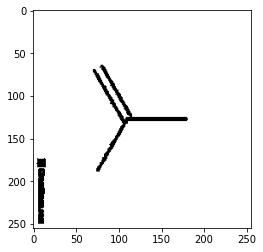

In [ ]:
plt.imshow((X_test.iloc[4,:]).values.reshape(255,255),cmap='gray')